# Проект №3 "Дашборд конверсий"

## Шаг 1. Импортируем библиотеки Pandas и Requests

In [1]:
import pandas as pd
import requests

## Шаг 2. Выполним запросы к API

Запросим данные за период с 2023-03-01 по 2023-09-01:

* *по визитам*:

In [2]:
r_vis = requests.get('https://data-charts-api.hexlet.app/visits?begin=2023-03-01&end=2023-09-01')

In [3]:
df_vis = r_vis.json()

In [4]:
visits = pd.DataFrame(df_vis)

In [5]:
visits.head() # получим первые 5 строк таблицы

,datetime,platform,user_agent,visit_id
0,"Wed, 01 Mar 2023 23:17:37 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,"Sat, 04 Mar 2023 03:23:34 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,"Wed, 01 Mar 2023 12:57:13 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,f149f542-e935-4870-9734-6b4501eaf614
3,"Wed, 01 Mar 2023 13:07:19 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
4,"Sun, 05 Mar 2023 22:02:39 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308871 entries, 0 to 308870
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   datetime    308871 non-null  object
 1   platform    308871 non-null  object
 2   user_agent  308871 non-null  object
 3   visit_id    308871 non-null  object
dtypes: object(4)
memory usage: 9.4+ MB


In [7]:
print(visits['visit_id'].agg(['count', 'nunique']))

count      308871
nunique    170101
Name: visit_id, dtype: int64


В датафрейме *visits* всего посещений 308871, из них уникальных посетителей - 170101.

* *по регистрациям*:

In [63]:
r_reg = requests.get('https://data-charts-api.hexlet.app/registrations?begin=2023-03-01&end=2023-09-01')

In [64]:
df_reg = r_reg.json()

In [65]:
registrations = pd.DataFrame(df_reg)

In [66]:
registrations.head() # получим первые 5 строк таблицы

,datetime,email,platform,registration_type,user_id
0,"Wed, 01 Mar 2023 13:21:20 GMT",jlane@example.net,web,google,8dd9b457-f02e-4cff-a66a-d70838849f04
1,"Wed, 01 Mar 2023 01:14:06 GMT",dyerkenneth@example.net,web,yandex,52e2b626-c6fa-4919-a67d-09adb33accdc
2,"Wed, 01 Mar 2023 19:47:32 GMT",kwade@example.com,web,yandex,bab974bd-2176-4497-acb2-4bc61ca93f5c
3,"Wed, 01 Mar 2023 19:19:26 GMT",fisherbrian@example.net,web,email,b517892a-15c0-4320-9f33-e65db1110395
4,"Wed, 01 Mar 2023 02:30:54 GMT",johngomez@example.org,web,google,bd38427f-7120-4c14-a384-889a2335108b


In [67]:
registrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28197 entries, 0 to 28196
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   datetime           28197 non-null  object
 1   email              28197 non-null  object
 2   platform           28197 non-null  object
 3   registration_type  28197 non-null  object
 4   user_id            28197 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


Проверим, уникальны ли *user_id* в датафрейме *registrations*:

In [68]:
print(registrations['user_id'].agg(['count', 'nunique']))

count      28197
nunique    28197
Name: user_id, dtype: int64


Общее число зарегистрированных пользователей совпадает с числом уникальных пользователей.

## Шаг 3. Расчет метрик

Отфильтруем данные по визитам, выбрав значения "bot" по колонке "user-agent":

In [8]:
filtered_visits = visits[visits['user_agent'].str.contains("bot")==True]

In [9]:
filtered_visits.head(7000)

,datetime,platform,user_agent,visit_id
611,"Sun, 05 Mar 2023 18:34:29 GMT",bot,AdsBot-Google (+http://www.google.com/adsbot.h...,3c7fd22a-67a1-48fd-b674-fa214431ab1f
786,"Sun, 05 Mar 2023 20:02:13 GMT",bot,AdsBot-Google (+http://www.google.com/adsbot.h...,63b086ee-773f-4b9b-9047-e0a4b0173f0a
831,"Sat, 22 Apr 2023 03:10:00 GMT",bot,AdsBot-Google (+http://www.google.com/adsbot.h...,e7997a03-787c-4d4a-94d6-27074d3c5145
13362,"Sat, 04 Mar 2023 04:11:19 GMT",bot,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,fa40ce72-248f-4f0e-8ef3-9fd135fa34de
13931,"Sat, 04 Mar 2023 03:29:15 GMT",bot,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,e15cdf34-81ea-4db9-afe1-6111d1dfd774
...,...,...,...,...
300838,"Thu, 24 Aug 2023 21:44:39 GMT",bot,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 5X Bu...,4ce9f524-325d-4edc-b827-231eaf2ac265
300839,"Thu, 24 Aug 2023 10:12:40 GMT",bot,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,c04c80f2-63e6-4469-95e0-118ed3cdd391
300840,"Thu, 24 Aug 2023 01:58:09 GMT",bot,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,bf09292d-16bc-4d44-9ef1-c95defea577e
300841,"Thu, 24 Aug 2023 21:36:10 GMT",bot,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,49d501ea-e85b-46fe-9c66-6c86de51ef01


Исключим из датафрейма *visits* строки со значением "bot" по полю "user_agent":

In [10]:
visits_without_bots = visits[visits['user_agent'].str.contains("bot")==False]

In [11]:
visits_without_bots.head(350000)

,datetime,platform,user_agent,visit_id
0,"Wed, 01 Mar 2023 23:17:37 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,"Sat, 04 Mar 2023 03:23:34 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,"Wed, 01 Mar 2023 12:57:13 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,f149f542-e935-4870-9734-6b4501eaf614
3,"Wed, 01 Mar 2023 13:07:19 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
4,"Sun, 05 Mar 2023 22:02:39 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
...,...,...,...,...
308866,"Sun, 27 Aug 2023 17:38:56 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,553eb09f-8809-429f-8f01-876f18305c96
308867,"Sun, 27 Aug 2023 03:54:11 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,cc664f35-6248-4953-81fd-1661cb91485c
308868,"Tue, 29 Aug 2023 00:33:03 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,99f32105-05b7-424e-ab3c-b3630e892d21
308869,"Wed, 30 Aug 2023 07:46:24 GMT",web,Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7...,99f32105-05b7-424e-ab3c-b3630e892d21


Определим количество уникальных визитов:

In [37]:
count_unique_visits = visits_without_bots.visit_id.nunique(dropna=True)
print(count_unique_visits)

163132


Оставим уникальные *visit_id*, отобрав только последний визит для каждого уникального *visit_id*:

In [50]:
unique_visits = visits_without_bots.sort_values(by='datetime', ascending=False).drop_duplicates(subset = 'visit_id')

In [51]:
unique_visits.head(164000)
unique_visits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163132 entries, 201364 to 203421
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   datetime    163132 non-null  object
 1   platform    163132 non-null  object
 2   user_agent  163132 non-null  object
 3   visit_id    163132 non-null  object
dtypes: object(4)
memory usage: 6.2+ MB


In [52]:
# конвертируем значения поля "datetime" таблицы визитов в формат даты:

# unique_visits['datetime'] = pd.to_datetime(unique_visits['datetime']).dt.date
# unique_visits['datetime'] = pd.to_datetime(unique_visits['datetime']).dt.normalize()
unique_visits['datetime'] = pd.to_datetime(unique_visits['datetime'], format='mixed')
unique_visits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163132 entries, 201364 to 203421
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   datetime    163132 non-null  datetime64[ns, UTC]
 1   platform    163132 non-null  object             
 2   user_agent  163132 non-null  object             
 3   visit_id    163132 non-null  object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 6.2+ MB


In [59]:
#df['timestamp'] = pd.to_datetime(df.timestamp).dt.tz_localize(None)
unique_visits['datetime'] = pd.to_datetime(unique_visits.datetime).dt.tz_localize(None)
unique_visits.head(164000)

,datetime,platform,user_agent,visit_id
201364,2023-05-31,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0661d4e6-84b3-4d58-8a22-a44d3f9972cc
201759,2023-05-31,android,Mozilla/5.0 (Android 13; Mobile; rv:109.0) Gec...,38e257d9-4003-4b8b-89db-47499589bd16
200979,2023-05-31,web,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,ed65ce9f-6c27-4c0d-8c93-d079422fc566
201472,2023-05-31,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,68c78afc-9335-4a4c-a51e-ea09c1f6f7bd
201384,2023-05-31,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0de9205c-ef09-4d62-b0c8-2a0c43684b1c
...,...,...,...,...
203914,2023-06-02,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,ad77e1e0-3a95-45e4-9183-17cd0d7fa68f
204316,2023-06-02,ios,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,d538a612-26eb-4ca9-b449-eb99eb61a44c
204318,2023-06-02,ios,Mozilla/5.0 (iPhone; CPU iPhone OS 15_8 like M...,ce6ffe37-fdd8-4dc5-a404-fcb73197158c
203629,2023-06-02,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,d627f0bc-6fdc-4902-ac23-959095968e42


In [60]:
# переименуем поле "datetime" в поле "date_group":
unique_vis_renamed = unique_visits.rename(columns={'datetime': 'date_group'})
unique_vis_renamed.head(164000)

,date_group,platform,user_agent,visit_id
201364,2023-05-31,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0661d4e6-84b3-4d58-8a22-a44d3f9972cc
201759,2023-05-31,android,Mozilla/5.0 (Android 13; Mobile; rv:109.0) Gec...,38e257d9-4003-4b8b-89db-47499589bd16
200979,2023-05-31,web,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,ed65ce9f-6c27-4c0d-8c93-d079422fc566
201472,2023-05-31,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,68c78afc-9335-4a4c-a51e-ea09c1f6f7bd
201384,2023-05-31,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0de9205c-ef09-4d62-b0c8-2a0c43684b1c
...,...,...,...,...
203914,2023-06-02,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,ad77e1e0-3a95-45e4-9183-17cd0d7fa68f
204316,2023-06-02,ios,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,d538a612-26eb-4ca9-b449-eb99eb61a44c
204318,2023-06-02,ios,Mozilla/5.0 (iPhone; CPU iPhone OS 15_8 like M...,ce6ffe37-fdd8-4dc5-a404-fcb73197158c
203629,2023-06-02,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,d627f0bc-6fdc-4902-ac23-959095968e42


Сгруппируем данные по полям "date_group", "platform", отсортировав по полю "date_group" от ранних дат к поздним:

In [61]:
unique_vis = unique_vis_renamed.sort_values('date_group').groupby(['date_group', 'platform']).agg({'visit_id': 'count'}).reset_index()
unique_vis = unique_vis.rename(columns={'visit_id': 'visits'})
unique_vis.head(600)

,date_group,platform,visits
0,2023-03-01,android,264
1,2023-03-01,ios,78
2,2023-03-01,web,1958
3,2023-03-02,android,106
4,2023-03-02,ios,103
...,...,...,...
547,2023-08-30,ios,40
548,2023-08-30,web,774
549,2023-08-31,android,80
550,2023-08-31,ios,16


In [76]:
# конвертируем значения поля "datetime" данных по регистрациям в форматы даты:

registrations['datetime'] = pd.to_datetime(registrations['datetime']).dt.normalize()
# registrations['datetime'] = pd.to_datetime(registrations['datetime'], format='mixed')
registrations.head()

,datetime,email,platform,registration_type,user_id
0,2023-03-01,jlane@example.net,web,google,8dd9b457-f02e-4cff-a66a-d70838849f04
1,2023-03-01,dyerkenneth@example.net,web,yandex,52e2b626-c6fa-4919-a67d-09adb33accdc
2,2023-03-01,kwade@example.com,web,yandex,bab974bd-2176-4497-acb2-4bc61ca93f5c
3,2023-03-01,fisherbrian@example.net,web,email,b517892a-15c0-4320-9f33-e65db1110395
4,2023-03-01,johngomez@example.org,web,google,bd38427f-7120-4c14-a384-889a2335108b


In [78]:
registrations['datetime'] = pd.to_datetime(registrations.datetime).dt.tz_localize(None)
registrations.head()

,datetime,email,platform,registration_type,user_id
0,2023-03-01,jlane@example.net,web,google,8dd9b457-f02e-4cff-a66a-d70838849f04
1,2023-03-01,dyerkenneth@example.net,web,yandex,52e2b626-c6fa-4919-a67d-09adb33accdc
2,2023-03-01,kwade@example.com,web,yandex,bab974bd-2176-4497-acb2-4bc61ca93f5c
3,2023-03-01,fisherbrian@example.net,web,email,b517892a-15c0-4320-9f33-e65db1110395
4,2023-03-01,johngomez@example.org,web,google,bd38427f-7120-4c14-a384-889a2335108b


In [79]:
# переименуем поле "datetime" в поле "date_group":
registrations_renamed = registrations.rename(columns={'datetime': 'date_group'})
registrations_renamed.head(28500)

,date_group,email,platform,registration_type,user_id
0,2023-03-01,jlane@example.net,web,google,8dd9b457-f02e-4cff-a66a-d70838849f04
1,2023-03-01,dyerkenneth@example.net,web,yandex,52e2b626-c6fa-4919-a67d-09adb33accdc
2,2023-03-01,kwade@example.com,web,yandex,bab974bd-2176-4497-acb2-4bc61ca93f5c
3,2023-03-01,fisherbrian@example.net,web,email,b517892a-15c0-4320-9f33-e65db1110395
4,2023-03-01,johngomez@example.org,web,google,bd38427f-7120-4c14-a384-889a2335108b
...,...,...,...,...,...
28192,2023-08-31,lunazachary@example.com,ios,email,7065467a-39d2-46c7-9041-ed7fbc8d801f
28193,2023-08-31,amyramirez@example.org,ios,apple,93a04829-5ab4-48b5-abf9-8e267150c512
28194,2023-08-31,webermark@example.org,ios,apple,6ff0e3b5-af42-42ba-ae6e-395051d79360
28195,2023-08-31,alexandermichael@example.com,ios,email,6d8b00e7-4696-43b1-8d79-91f2b7bef9cd


Сгруппируем данные по полям "date_group", "platform", отсортировав по полю "date_group" от ранних дат к поздним:

In [80]:
regs = registrations_renamed.sort_values('date_group').groupby(['date_group', 'platform']).agg({'user_id': 'count'}).reset_index()
regs = regs.rename(columns={'user_id': 'registrations'})
regs.head(600)

,date_group,platform,registrations
0,2023-03-01,android,218
1,2023-03-01,ios,67
2,2023-03-01,web,78
3,2023-03-02,android,91
4,2023-03-02,ios,76
...,...,...,...
547,2023-08-30,ios,32
548,2023-08-30,web,18
549,2023-08-31,android,67
550,2023-08-31,ios,13


Объединим датафреймы визитов и регистраций в один:

In [81]:
df_merged = pd.merge(
    unique_vis, regs,
    left_on=['date_group', 'platform'],
    right_on=['date_group', 'platform'])

df_merged.head(1000)

,date_group,platform,visits,registrations
0,2023-03-01,android,264,218
1,2023-03-01,ios,78,67
2,2023-03-01,web,1958,78
3,2023-03-02,android,106,91
4,2023-03-02,ios,103,76
...,...,...,...,...
547,2023-08-30,ios,40,32
548,2023-08-30,web,774,18
549,2023-08-31,android,80,67
550,2023-08-31,ios,16,13


Рассчитаем конверсию сайта (сколько посетителей совершили целевое действие, т.е. зарегистрировались на сайте):

In [82]:
df_merged['conversion'] = (df_merged['registrations'] / df_merged['visits'] * 100).round(2)
df_merged.head(1000)

,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,264,218,82.58
1,2023-03-01,ios,78,67,85.90
2,2023-03-01,web,1958,78,3.98
3,2023-03-02,android,106,91,85.85
4,2023-03-02,ios,103,76,73.79
...,...,...,...,...,...
547,2023-08-30,ios,40,32,80.00
548,2023-08-30,web,774,18,2.33
549,2023-08-31,android,80,67,83.75
550,2023-08-31,ios,16,13,81.25


Сохраним датафрейм с расчетом конверсии в формате JSON:

In [83]:
df_json = df_merged.to_json('conversion.json', orient='records')

## Шаг 4. Присоединим данные по рекламным кампаниям к датафрейму с расчетом конверсии

Получим данные по рекламным кампаниям из файла *ads.csv*:

In [85]:
ads = pd.read_csv('ads.csv')
ads.head(200)

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01T09:16:57,google,cpc,virtual_reality_workshop,238
1,2023-03-02T12:48:25,google,cpc,virtual_reality_workshop,164
2,2023-03-03T13:39:30,google,cpc,virtual_reality_workshop,240
3,2023-03-04T16:42:54,google,cpc,virtual_reality_workshop,167
4,2023-03-05T03:58:19,google,cpc,virtual_reality_workshop,268
...,...,...,...,...,...
175,2023-09-05T18:19:25,yandex,cpc,cybersecurity_special,221
176,2023-09-06T19:57:25,yandex,cpc,cybersecurity_special,124
177,2023-09-07T16:04:38,yandex,cpc,cybersecurity_special,211
178,2023-09-08T23:56:00,yandex,cpc,cybersecurity_special,195


In [86]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          180 non-null    object
 1   utm_source    180 non-null    object
 2   utm_medium    180 non-null    object
 3   utm_campaign  180 non-null    object
 4   cost          180 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 7.2+ KB


In [92]:
# конвертируем значения поля "datetime" данных по рекламным кампаниям в формат даты:
ads['date'] = pd.to_datetime(ads['date']).dt.normalize()
ads['date'] = pd.to_datetime(ads['date']).dt.tz_localize(None)
ads.head(200)

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,virtual_reality_workshop,238
1,2023-03-02,google,cpc,virtual_reality_workshop,164
2,2023-03-03,google,cpc,virtual_reality_workshop,240
3,2023-03-04,google,cpc,virtual_reality_workshop,167
4,2023-03-05,google,cpc,virtual_reality_workshop,268
...,...,...,...,...,...
175,2023-09-05,yandex,cpc,cybersecurity_special,221
176,2023-09-06,yandex,cpc,cybersecurity_special,124
177,2023-09-07,yandex,cpc,cybersecurity_special,211
178,2023-09-08,yandex,cpc,cybersecurity_special,195


Отберем данные за исследуемый период с 2023-03-01 по 2023-09-01:

In [93]:
filtered_ads = ads.loc[(ads['date'] >= '2023-03-01')
                     & (ads['date'] < '2023-09-01')]
filtered_ads.head(200)

,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,virtual_reality_workshop,238
1,2023-03-02,google,cpc,virtual_reality_workshop,164
2,2023-03-03,google,cpc,virtual_reality_workshop,240
3,2023-03-04,google,cpc,virtual_reality_workshop,167
4,2023-03-05,google,cpc,virtual_reality_workshop,268
...,...,...,...,...,...
166,2023-08-27,yandex,cpc,cybersecurity_special,290
167,2023-08-28,yandex,cpc,cybersecurity_special,250
168,2023-08-29,yandex,cpc,cybersecurity_special,135
169,2023-08-30,yandex,cpc,cybersecurity_special,130


In [94]:
# переименуем поле "date" в поле "date_group":
ads_renamed = filtered_ads.rename(columns={'date': 'date_group'})
ads_renamed.head(200)

,date_group,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,virtual_reality_workshop,238
1,2023-03-02,google,cpc,virtual_reality_workshop,164
2,2023-03-03,google,cpc,virtual_reality_workshop,240
3,2023-03-04,google,cpc,virtual_reality_workshop,167
4,2023-03-05,google,cpc,virtual_reality_workshop,268
...,...,...,...,...,...
166,2023-08-27,yandex,cpc,cybersecurity_special,290
167,2023-08-28,yandex,cpc,cybersecurity_special,250
168,2023-08-29,yandex,cpc,cybersecurity_special,135
169,2023-08-30,yandex,cpc,cybersecurity_special,130


In [95]:
df_merged_ads = pd.merge(
    df_merged, ads_renamed,
    left_on='date_group',
    right_on='date_group',
    how='outer')

df_merged_ads.head(1000)

,date_group,platform,visits,registrations,conversion,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,android,264,218,82.58,google,cpc,virtual_reality_workshop,238.0
1,2023-03-01,ios,78,67,85.90,google,cpc,virtual_reality_workshop,238.0
2,2023-03-01,web,1958,78,3.98,google,cpc,virtual_reality_workshop,238.0
3,2023-03-02,android,106,91,85.85,google,cpc,virtual_reality_workshop,164.0
4,2023-03-02,ios,103,76,73.79,google,cpc,virtual_reality_workshop,164.0
...,...,...,...,...,...,...,...,...,...
547,2023-08-30,ios,40,32,80.00,yandex,cpc,cybersecurity_special,130.0
548,2023-08-30,web,774,18,2.33,yandex,cpc,cybersecurity_special,130.0
549,2023-08-31,android,80,67,83.75,yandex,cpc,cybersecurity_special,192.0
550,2023-08-31,ios,16,13,81.25,yandex,cpc,cybersecurity_special,192.0


In [96]:
# удалим из датафрейма df_merged_ads столбцы "utm_source", "utm_medium":
df_merged_ads_1 = df_merged_ads.drop(['utm_source', 'utm_medium'], axis=1)

# Заполним пропуски по столбцам "utm_campaign" и "cost" значениями "none" и "0" соответственно:
df_merged_ads_1 = df_merged_ads_1.fillna({'utm_campaign': 'none', 'cost':0})

# Переименуем столбец "utm_campaign" в "campaign":
df_merged_ads_1 = df_merged_ads_1.rename(columns={'utm_campaign': 'campaign'})
df_merged_ads_1.head(600)

,date_group,platform,visits,registrations,conversion,campaign,cost
0,2023-03-01,android,264,218,82.58,virtual_reality_workshop,238.0
1,2023-03-01,ios,78,67,85.90,virtual_reality_workshop,238.0
2,2023-03-01,web,1958,78,3.98,virtual_reality_workshop,238.0
3,2023-03-02,android,106,91,85.85,virtual_reality_workshop,164.0
4,2023-03-02,ios,103,76,73.79,virtual_reality_workshop,164.0
...,...,...,...,...,...,...,...
547,2023-08-30,ios,40,32,80.00,cybersecurity_special,130.0
548,2023-08-30,web,774,18,2.33,cybersecurity_special,130.0
549,2023-08-31,android,80,67,83.75,cybersecurity_special,192.0
550,2023-08-31,ios,16,13,81.25,cybersecurity_special,192.0


In [97]:
df_merged_ads_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_group     552 non-null    datetime64[ns]
 1   platform       552 non-null    object        
 2   visits         552 non-null    int64         
 3   registrations  552 non-null    int64         
 4   conversion     552 non-null    float64       
 5   campaign       552 non-null    object        
 6   cost           552 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 30.3+ KB


In [98]:
# сохраним полученный датафрейм df_merged_ads_1 в файл "out.json":

out_json = df_merged_ads_1.to_json('out.json', orient='records')

## Шаг 5. Визуализация расчетов

Импортируем библиотеки для визуализации:

In [99]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import plotly.express as px
import seaborn as sns

In [100]:
%matplotlib inline
!pip install plotly

Построим столбчатый график итоговых визитов за каждый день:

In [116]:
total_visits = df_merged_ads_1[['date_group', 'visits']]
#total_visits['date_group'] = total_visits['date_group'].dt.date
total_visits_sum = total_visits.groupby('date_group').sum().reset_index()
total_visits_sum.head(600)

,date_group,visits
0,2023-03-01,2300
1,2023-03-02,1706
2,2023-03-03,817
3,2023-03-04,1680
4,2023-03-05,2086
...,...,...
179,2023-08-27,579
180,2023-08-28,349
181,2023-08-29,1338
182,2023-08-30,861


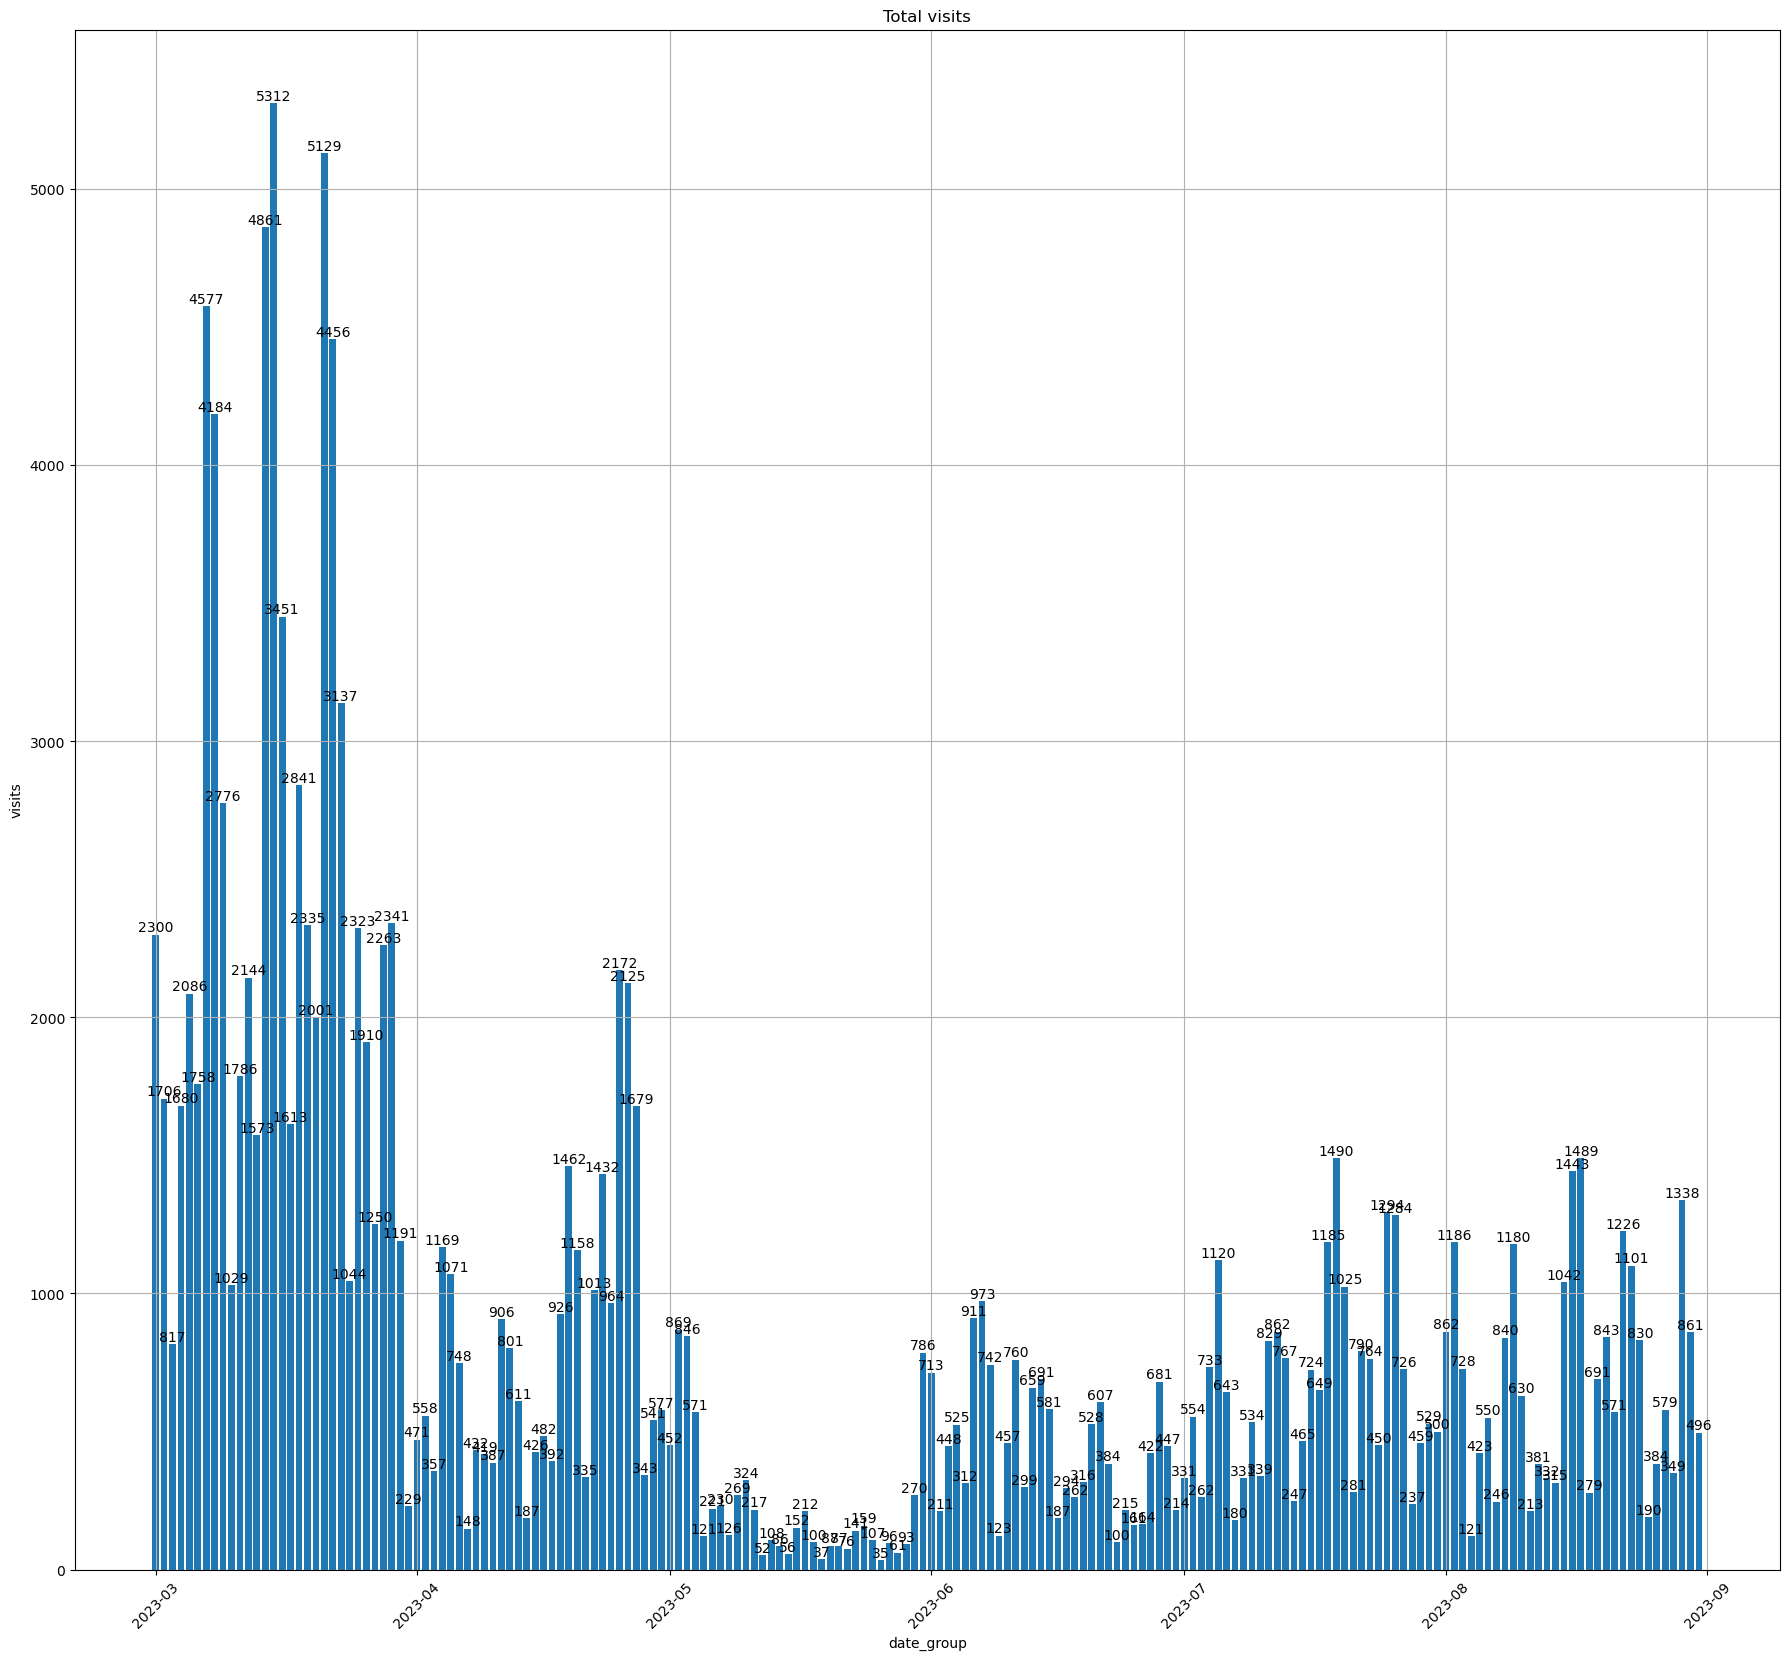

In [123]:
fig, ax = plt.subplots(figsize=(22,20))
plt.title('Total visits')
bars = plt.bar(x='date_group', height='visits', data=total_visits_sum)
ax.bar_label(bars)
plt.xlabel('date_group')
plt.ylabel('visits')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Построим столбчатый график итоговых визитов с разбивкой по платформам:

In [133]:
total_visits_of_platform = df_merged_ads_1[['date_group', 'platform', 'visits']]
# total_visits['date_group'] = total_visits['date_group'].dt.date
# total_visits_sum = total_visits.groupby('date_group').sum().reset_index()
print(total_visits_of_platform)

    date_group platform  visits
0   2023-03-01  android     264
1   2023-03-01      ios      78
2   2023-03-01      web    1958
3   2023-03-02  android     106
4   2023-03-02      ios     103
..         ...      ...     ...
547 2023-08-30      ios      40
548 2023-08-30      web     774
549 2023-08-31  android      80
550 2023-08-31      ios      16
551 2023-08-31      web     400

[552 rows x 3 columns]


In [131]:
# fig, ax = plt.subplots(figsize=(22,20))
# plt.title('Visits by Platform (Stacked)')
# bars = plt.bar(x='date_group', height='visits', data=total_visits_of_platform)
# total_visits_of_platform.plot( 
#     x='date_group',
#     kind='bar', 
#     stacked=True, 
#     title='Visits by Platform (Stacked)', 
#     mark_right=True)
android = total_visits_of_platform.loc[(total_visits_of_platform['visits']) & (total_visits_of_platform['platform'] == 'android')]
android.head(600)
#ios = 
#web = 
#plt.xticks(rotation=45)
#plt.grid()
#plt.show()

,date_group,platform,visits
6,2023-03-03,android,251
9,2023-03-04,android,193
12,2023-03-05,android,287
33,2023-03-12,android,255
36,2023-03-13,android,261
...,...,...,...
519,2023-08-21,android,69
522,2023-08-22,android,123
528,2023-08-24,android,79
540,2023-08-28,android,55
